
🔍 Monthly PV System Loss Analysis:

    Year  Month   Power  Ideal_Energy_kWh  Expected_Energy_kWh  \
0   2023      1  163.68        851.088860           784.363494   
1   2023      2  179.92        935.532183           862.186460   
2   2023      3  199.40       1036.822573           955.535683   
3   2023      4  198.29       1031.050892           950.216503   
4   2023      5  186.23        968.342366           892.424324   
5   2023      6  170.35        885.770939           816.326498   
6   2023      7  133.20        692.601638           638.301670   
7   2023      8  177.34        922.116926           849.822959   
8   2023      9  153.76        799.507717           736.826312   
9   2023     10  161.31        838.765543           773.006324   
10  2023     11  131.21        682.254212           628.765481   
11  2023     12  127.16        661.195378           609.357660   

    Actual_Energy_kWh  Total_Loss_kWh  Residual_Loss_%  
0                 630      154.363494        19

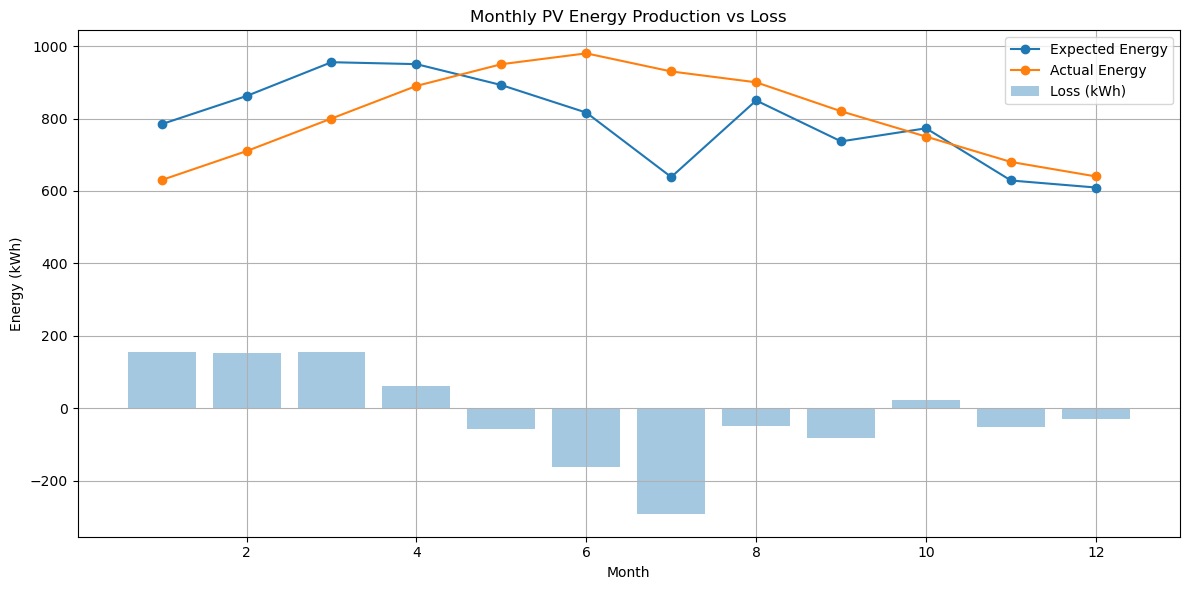

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file (change file path if needed)
df = pd.read_csv('POWER_Point_Bangalore.csv', skiprows=10)
df.columns = ['Year', 'Month', 'Day', 'Power']
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

# Step 1: Group by month and sum daily irradiance
monthly_irradiance = df.groupby(['Year', 'Month'])['Power'].sum().reset_index()

# Step 2: PV system specifications
panel_power_w = 325             # per panel
panel_efficiency = 0.167
panel_area_m2 = 1.946
num_panels = 16
inverter_eff = 0.96
temp_loss = 0.04

total_area = panel_area_m2 * num_panels
known_loss_fraction = 1 - (inverter_eff * (1 - temp_loss))  # 7.84% loss

# Step 3: Calculate ideal and expected energy
monthly_irradiance['Ideal_Energy_kWh'] = monthly_irradiance['Power'] * total_area * panel_efficiency
monthly_irradiance['Expected_Energy_kWh'] = monthly_irradiance['Ideal_Energy_kWh'] * (1 - known_loss_fraction)

# Step 4: Add actual energy generation data (from your screenshot)
actual_energy_kWh = [630, 710, 800, 890, 950, 980, 930, 900, 820, 750, 680, 640]
monthly_irradiance = monthly_irradiance.iloc[:12].copy()
monthly_irradiance['Actual_Energy_kWh'] = actual_energy_kWh

# Step 5: Calculate losses
monthly_irradiance['Total_Loss_kWh'] = monthly_irradiance['Expected_Energy_kWh'] - monthly_irradiance['Actual_Energy_kWh']
monthly_irradiance['Residual_Loss_%'] = (monthly_irradiance['Total_Loss_kWh'] / monthly_irradiance['Expected_Energy_kWh']) * 100

# Step 6: Display results
print("\n🔍 Monthly PV System Loss Analysis:\n")
print(monthly_irradiance[['Year', 'Month', 'Power', 'Ideal_Energy_kWh', 'Expected_Energy_kWh', 'Actual_Energy_kWh', 'Total_Loss_kWh', 'Residual_Loss_%']])

# Step 7: Optional plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_irradiance['Month'], monthly_irradiance['Expected_Energy_kWh'], label='Expected Energy', marker='o')
plt.plot(monthly_irradiance['Month'], monthly_irradiance['Actual_Energy_kWh'], label='Actual Energy', marker='o')
plt.bar(monthly_irradiance['Month'], monthly_irradiance['Total_Loss_kWh'], alpha=0.4, label='Loss (kWh)')
plt.title('Monthly PV Energy Production vs Loss')
plt.xlabel('Month')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the full file first to find the correct header row
raw_df = pd.read_csv('POWER_Point_Bangalore.csv', header=None)

# Step 2: Print first 10 rows to find where the actual data starts
print(raw_df.head(10))


                                                   0    1    2      3
0                                     -BEGIN HEADER-  NaN  NaN    NaN
1    NASA/POWER Source Native Resolution Daily Data   NaN  NaN    NaN
2  Dates (month/day/year): 01/01/2023 through 03/...  NaN  NaN    NaN
3    Location: latitude  12.967   longitude 77.6043   NaN  NaN    NaN
4  elevation from MERRA-2: Average for 0.5 x 0.62...  NaN  NaN    NaN
5  The value for missing source data that cannot ...  NaN  NaN    NaN
6                                     parameter(s):   NaN  NaN    NaN
7                                               thdd  NaN  NaN    NaN
8                                       -END HEADER-  NaN  NaN    NaN
9                                               YEAR   MO   DY  Power


In [18]:
print(df.columns)



Index(['YEAR', 'MO', 'DY', 'Power'], dtype='object')


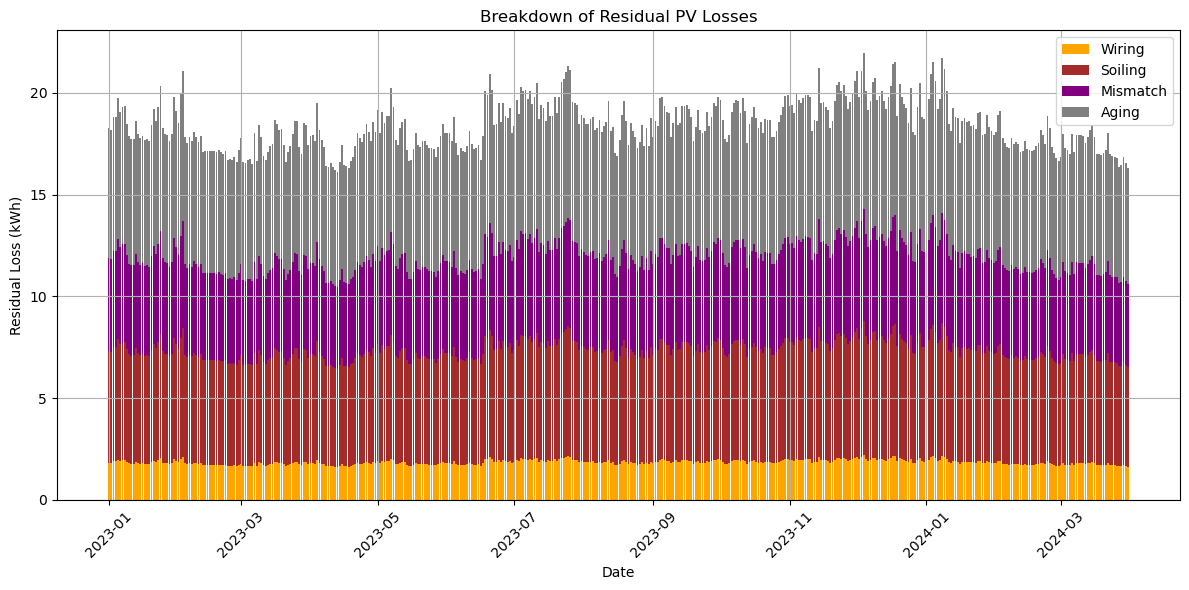

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load file and clean column names
df = pd.read_csv("POWER_Point_Bangalore.csv", skiprows=9)
df.columns = df.columns.str.strip()

# Rename correctly if necessary (print to confirm)
expected_cols = ['YEAR', 'MO', 'DY', 'Power']
df.columns = expected_cols[:len(df.columns)]  # safely rename only available columns

# Convert to integers (safe from missing columns)
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce').fillna(0).astype(int)
df['MO'] = pd.to_numeric(df['MO'], errors='coerce').fillna(1).astype(int)
df['DY'] = pd.to_numeric(df['DY'], errors='coerce').fillna(1).astype(int)

# Combine into date
df['Date'] = pd.to_datetime(dict(year=df['YEAR'], month=df['MO'], day=df['DY']), errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

# ---------------- PANEL SPEC ----------------
panel_power_w = 325
panel_efficiency = 0.167
panel_area_m2 = 1.946
num_panels = 16
inverter_eff = 0.96
temp_loss = 0.04

# Total expected generation
total_capacity_w = panel_power_w * num_panels
expected_generation_kwh = (total_capacity_w * 5 / 1000) * inverter_eff * (1 - temp_loss)

# Measured power (rename if needed)
df['Measured_Output'] = pd.to_numeric(df['Power'], errors='coerce').fillna(0)

# Calculate residual loss
df['Residual_Loss'] = expected_generation_kwh - df['Measured_Output']
df['Residual_Loss'] = df['Residual_Loss'].clip(lower=0)

# Loss shares
loss_shares = {
    'Wiring': 0.10,
    'Soiling': 0.30,
    'Module Mismatch': 0.25,
    'Aging': 0.35
}

# Calculate loss components
df['Wiring_Loss'] = df['Residual_Loss'] * loss_shares['Wiring']
df['Soiling_Loss'] = df['Residual_Loss'] * loss_shares['Soiling']
df['Mismatch_Loss'] = df['Residual_Loss'] * loss_shares['Module Mismatch']
df['Aging_Loss'] = df['Residual_Loss'] * loss_shares['Aging']

# ---------------- PLOT ----------------
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Wiring_Loss'], label='Wiring', color='orange')
plt.bar(df['Date'], df['Soiling_Loss'], bottom=df['Wiring_Loss'], label='Soiling', color='brown')
plt.bar(df['Date'], df['Mismatch_Loss'], bottom=df['Wiring_Loss'] + df['Soiling_Loss'], label='Mismatch', color='purple')
plt.bar(df['Date'], df['Aging_Loss'], bottom=df['Wiring_Loss'] + df['Soiling_Loss'] + df['Mismatch_Loss'], label='Aging', color='gray')

plt.xlabel('Date')
plt.ylabel('Residual Loss (kWh)')
plt.title('Breakdown of Residual PV Losses')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


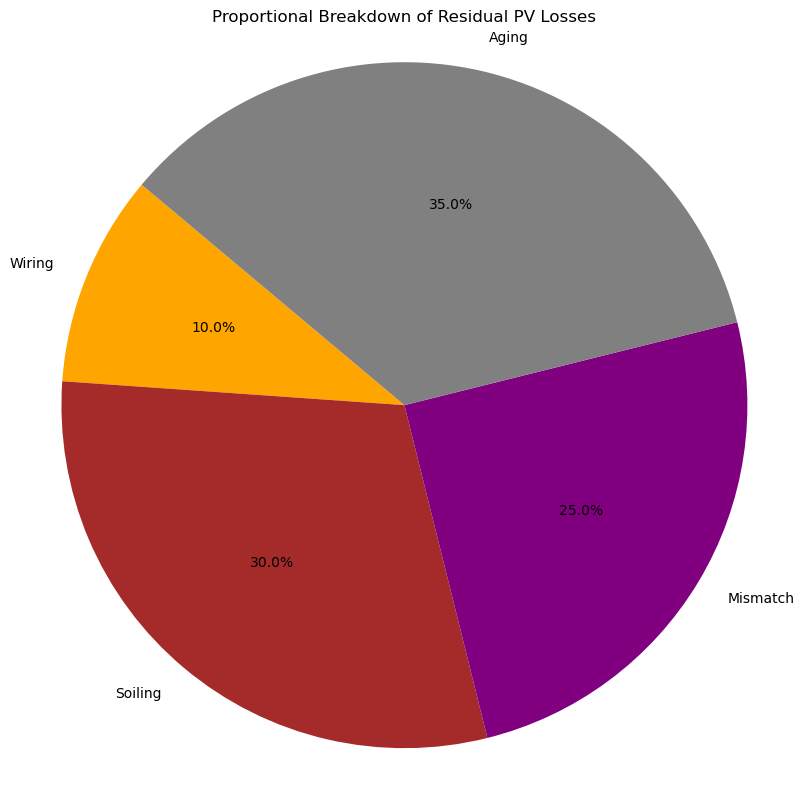

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load file and clean column names
df = pd.read_csv("POWER_Point_Bangalore.csv", skiprows=9)
df.columns = df.columns.str.strip()

# Rename correctly if necessary (print to confirm)
expected_cols = ['YEAR', 'MO', 'DY', 'Power']
df.columns = expected_cols[:len(df.columns)]

# Convert to integers
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce').fillna(0).astype(int)
df['MO'] = pd.to_numeric(df['MO'], errors='coerce').fillna(1).astype(int)
df['DY'] = pd.to_numeric(df['DY'], errors='coerce').fillna(1).astype(int)

# Combine into date
df['Date'] = pd.to_datetime(dict(year=df['YEAR'], month=df['MO'], day=df['DY']), errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

# ---------------- PANEL SPEC ----------------
panel_power_w = 325
panel_efficiency = 0.167
panel_area_m2 = 1.946
num_panels = 16
inverter_eff = 0.96
temp_loss = 0.04

# Total expected generation
total_capacity_w = panel_power_w * num_panels
expected_generation_kwh = (total_capacity_w * 5 / 1000) * inverter_eff * (1 - temp_loss)

# Measured power
df['Measured_Output'] = pd.to_numeric(df['Power'], errors='coerce').fillna(0)

# Calculate residual loss
df['Residual_Loss'] = expected_generation_kwh - df['Measured_Output']
df['Residual_Loss'] = df['Residual_Loss'].clip(lower=0)

# Loss shares
loss_shares = {
    'Wiring': 0.10,
    'Soiling': 0.30,
    'Module Mismatch': 0.25,
    'Aging': 0.35
}

# Calculate loss components
df['Wiring_Loss'] = df['Residual_Loss'] * loss_shares['Wiring']
df['Soiling_Loss'] = df['Residual_Loss'] * loss_shares['Soiling']
df['Mismatch_Loss'] = df['Residual_Loss'] * loss_shares['Module Mismatch']
df['Aging_Loss'] = df['Residual_Loss'] * loss_shares['Aging']

# ---------------- PIE CHART ----------------
total_losses = {
    'Wiring': df['Wiring_Loss'].sum(),
    'Soiling': df['Soiling_Loss'].sum(),
    'Mismatch': df['Mismatch_Loss'].sum(),
    'Aging': df['Aging_Loss'].sum()
}

plt.figure(figsize=(8, 8))
plt.pie(total_losses.values(), labels=total_losses.keys(), autopct='%1.1f%%', startangle=140, colors=['orange', 'brown', 'purple', 'gray'])
plt.title('Proportional Breakdown of Residual PV Losses')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()
